## Linear Support Vector Machines

Support Vector Machines (SVM) adalah salah satu metode yang sangat baik untuk klasifikasi data, namun datanya terbatas. Intinya, SVM memisahkan data melintasi batas-batas keputusan. Subset data yang mendukung batas keputusan disebut **Support Vektor**. Batasan keputusan ditemukan dengan menentukan **hyperplane** yang ditempatkan di tengah-tengah batas keputusan.



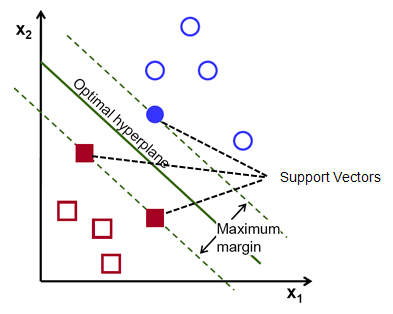

Untuk menemukan hyperplane optimal (yaitu posisi terbaik sehingga dapat membantu mengklasifikasikan secara efisien dengan menentukan batas keputusan terbaik), perlu untuk memaksimalkan jarak antara hyperplane dan support vector, margin maksimum, seperti yang ditunjukkan pada Gambar di atas. Sebuah titik uji kemudian diklasifikasikan dengan membandingkan posisi relatifnya terhadap hyperplane.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df_iris=pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Histogram dari petal length menurut spesies

C:\Users\Windows\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

Matplotlib is building the font cache; this may take a moment.


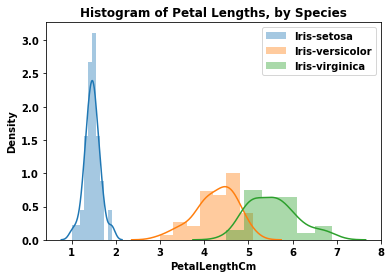

In [3]:
setosa=df_iris.iloc[:50,:]
versicolor=df_iris.iloc[50:100,:]
virginica=df_iris.iloc[100:150,:]

sns.distplot(a=setosa['PetalLengthCm'], label="Iris-setosa")
sns.distplot(a=versicolor['PetalLengthCm'], label="Iris-versicolor" )
sns.distplot(a=virginica['PetalLengthCm'], label="Iris-virginica")

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

Untuk mempermudah, hanya akan membedakan antara *Iris Setosa* dan *Iris Versicolor*, jadi dataframe dengan data ini dibuat. Selain itu, hanya dua fitur yang akan dipertimbangkan: Sepal Width dan Petal Length. Jadi feature space adalah 2-dimensi, dan hyperplane akan menjadi sebuah garis. Dalam kasus ruang fitur Dimensi-N, hyperline akan menjadi (N-1)-Dimensi.

In [4]:
df=df_iris.iloc[:100,2:4]

Sebuah plot untuk melihat distribusi Iris Setosa dan Iris Versicolor

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


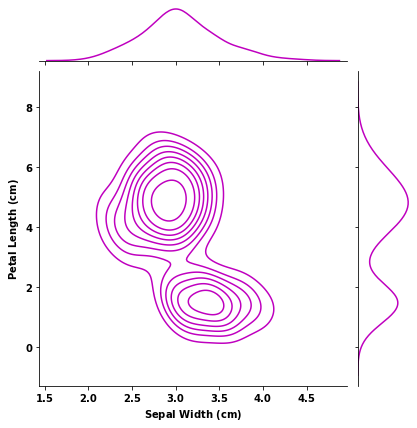

In [5]:
g=sns.jointplot(x=df_iris['SepalWidthCm'], y=df_iris['PetalLengthCm'],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=5, linewidth=1)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Sepal$ $Width$ $(cm)$", "$Petal$ $Length$ $(cm)$");

SVM dalam scikit-learn mendukung dense, tetapi tidak untuk dataframe. Array X yang berisi fitur(features) dibuat.

In [6]:
X=df.to_numpy()

Mengubah nilai string menjadi tipe int untuk label Setosa = 0 Versicolor = 1

In [7]:
y=df_iris.iloc[:100,-1]
y = LabelEncoder().fit_transform(y)

Model ini ditrain dengan membagi data menjadi subset train dan test:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

svc = LinearSVC()
model_fit=svc.fit(X_train, y_train)

Mencari support vectors:

In [9]:
decision_function = model_fit.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

Plot berikut menunjukkan training vectors, decision boundaries dan hyperplane. Support vectors dilingkari dengan warna merah.

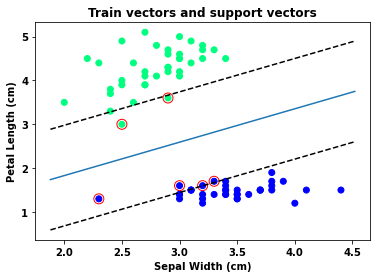

In [10]:
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='winter')
ax=plt.gca()
xlim=ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Train vectors and support vectors')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='r')

Text(0.5, 1.0, 'Test vectors')

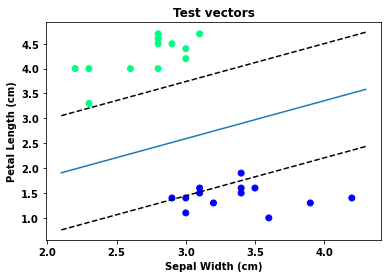

In [11]:
plt.figure()
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='winter')
ax=plt.gca()
xlim=ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Test vectors')

The confusion Matrix:

In [12]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[13  0]
 [ 0 12]]
Accuracy: 100.00%


Dari 25 vektor uji, semuanya diklasifikasikan dengan benar